## K-meansクラスタリング
* 本実習では教師なし学習の一種であるK-meansクラスタリングを行ないます。
    * K-means とは何か、知らない人は下記リンク参照↓
        * [K-平均法のアルゴリズム](http://image.slidesharecdn.com/02-kver2-0-110528032516-phpapp02/95/02-kver20-9-728.jpg) 
        * [クラスタリングの定番アルゴリズム「K-means法」をビジュアライズしてみた](http://tech.nitoyon.com/ja/blog/2009/04/09/kmeans-visualise/)
* 本実習は[総合実験（１〜４日目）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%91%E6%97%A5%E7%9B%AE.ipynb)の内容を全て理解していることを前提としています。

### まずはサンプルデータの取得から

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/SchoolScore.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'SchoolScore.txt')

('SchoolScore.txt', <httplib.HTTPMessage instance at 0x104143e18>)

In [2]:
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("SchoolScore.txt", sep='\t', na_values=".") # データの読み込み

### 得られたデータを確認します。全体像も眺めます。

In [3]:
df.head() #データの確認

,Student,Japanese,Math,English
0,0,80,85,100
1,1,96,100,100
2,2,54,83,98
3,3,80,98,98
4,4,90,92,91


In [4]:
df.iloc[:, 1:].head() #解析に使うデータは２列目以降

,Japanese,Math,English
0,80,85,100
1,96,100,100
2,54,83,98
3,80,98,98
4,90,92,91


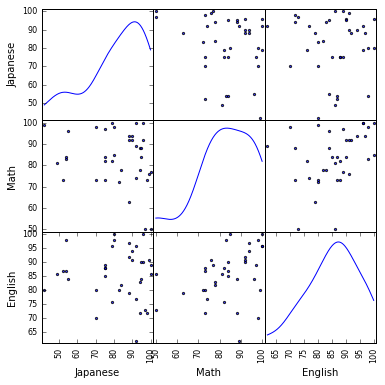

In [5]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
plotting.scatter_matrix(df[df.columns[1:]], figsize=(6,6), alpha=0.8, diagonal='kde')   #全体像を眺める
plt.show()

### さていよいよ K-means クラスタリングの実行です。

* たくさんの学生を、合計点ではなく、国語・数学・英語の学力が似ている３クラスタに分類してクラス分けをしたいと思います。

In [6]:
from sklearn.cluster import KMeans # K-means クラスタリングをおこなう
# この例では 3 つのグループに分割 (メルセンヌツイスターの乱数の種を 10 とする)
kmeans_model = KMeans(n_clusters=3, random_state=10).fit(df.iloc[:, 1:])

In [7]:
# 分類結果のラベルを取得する
labels = kmeans_model.labels_

In [8]:
# 分類結果を確認
labels

array([2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

これでいちおう結果は得られました。ですが、これだけ見せられてもピンとこないので、結果を図示しましょう。

### 分類結果を図示する。

In [9]:
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}

In [10]:
# サンプル毎に色を与える。
colors = [color_codes[x] for x in labels]

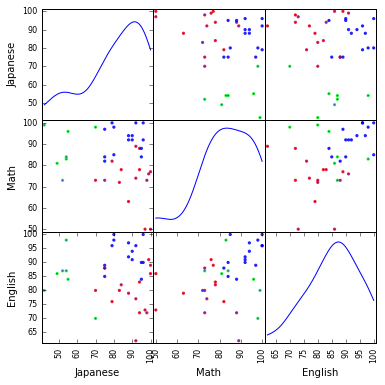

In [11]:
# 色分けした Scatter Matrix を描く。
plotting.scatter_matrix(df[df.columns[1:]], figsize=(6,6), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
plt.show()

いちおう色分けされました。なんとなく学力の似ているクラスタに分かれたような気がしますが、これでもまだピンとこないかもしれません。

### 主成分分析をして、K-meansの結果をマッピングする。

主成分分析とは何か、どうやるか忘れた人は右記リンク参照→[総合実験３日目](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%93%E6%97%A5%E7%9B%AE.ipynb)

In [12]:
#import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 1:])

PCA(copy=True, n_components=None, whiten=False)

In [13]:
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 1:])

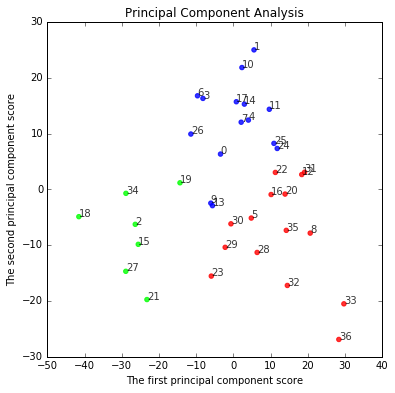

In [14]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(feature[:, 0], feature[:, 1], df.iloc[:, 0]):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score")
plt.ylabel("The second principal component score")
plt.show()

K-meansでどのように分かれたか、これで（さっきよりは）はっきり分かったかもしれません。

----------
## 課題
新しいノートを開いて、以下の課題を解いてください。

* __課題1__:  下記リンクのデータを用い、１５０個のアヤメをK-means法で３つのクラスタに分類してください。
    https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt
* __課題2__: 分類結果を Scatter Matrix で確認してください。
* __課題3__: 分類結果を主成分分析で確認してください。
* __課題4__: クラスタ数を４つや５つなどに変更するとどうなるか確認してください。

お疲れ様でした。他の教材は随時下記に追加予定です。→ [IPython Notebook](https://sites.google.com/site/masaakikotera/8-python/8-2-ipython-notebook)